### Stock Market Prediction And Forecasting Using Stacked LSTM

In [46]:
### Keras and Tensorflow >2.0

In [47]:
### Data Collection
import pandas_datareader as pdr
key=""

In [48]:
df = pdr.get_data_tiingo('AAPL', api_key='d4f7a497c5dae8f91d5f3e949847471bce3672e8')

In [49]:
df.to_csv('AAPL.csv')

In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('AAPL.csv')

In [52]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-23 00:00:00+00:00,117.75,119.73,117.34,119.27,32482528,27.269555,27.728101,27.174604,27.621570,129930112,0.0,1.0
1,AAPL,2015-11-24 00:00:00+00:00,118.88,119.35,117.12,117.33,42803172,27.531251,27.640097,27.123655,27.172288,171212688,0.0,1.0
2,AAPL,2015-11-25 00:00:00+00:00,118.03,119.23,117.92,119.21,21388308,27.334400,27.612307,27.308926,27.607675,85553232,0.0,1.0
3,AAPL,2015-11-27 00:00:00+00:00,117.81,118.41,117.60,118.29,13046445,27.283451,27.422404,27.234817,27.394613,52185780,0.0,1.0
4,AAPL,2015-11-30 00:00:00+00:00,118.30,119.41,117.75,117.99,39180322,27.396929,27.653993,27.269555,27.325137,156721288,0.0,1.0


In [53]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-11-16 00:00:00+00:00,120.30,120.9900,118.146,118.92,91183018,120.30,120.9900,118.146,118.92,91183018,0.0,1.0
1255,AAPL,2020-11-17 00:00:00+00:00,119.39,120.6741,118.960,119.55,74270973,119.39,120.6741,118.960,119.55,74270973,0.0,1.0
1256,AAPL,2020-11-18 00:00:00+00:00,118.03,119.8200,118.000,118.61,76322111,118.03,119.8200,118.000,118.61,76322111,0.0,1.0
1257,AAPL,2020-11-19 00:00:00+00:00,118.64,119.0600,116.810,117.59,74112972,118.64,119.0600,116.810,117.59,74112972,0.0,1.0
1258,AAPL,2020-11-20 00:00:00+00:00,117.34,118.7700,117.290,118.64,73604287,117.34,118.7700,117.290,118.64,73604287,0.0,1.0


In [54]:
df1=df.reset_index()['close']

In [55]:
df1

0       117.75
1       118.88
2       118.03
3       117.81
4       118.30
         ...  
1254    120.30
1255    119.39
1256    118.03
1257    118.64
1258    117.34
Name: close, Length: 1259, dtype: float64

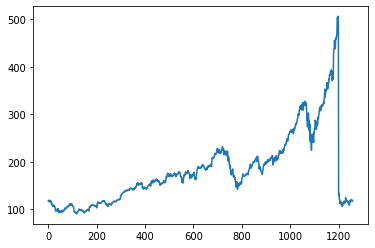

In [56]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [57]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [58]:
import numpy as np

In [59]:
df1

0       117.75
1       118.88
2       118.03
3       117.81
4       118.30
         ...  
1254    120.30
1255    119.39
1256    118.03
1257    118.64
1258    117.34
Name: close, Length: 1259, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
print(df1)

[[0.06592904]
 [0.06864702]
 [0.06660253]
 ...
 [0.06660253]
 [0.06806975]
 [0.06494287]]


In [62]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [63]:
training_size,test_size

(818, 441)

In [64]:
train_data

array([[0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.009

In [65]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [67]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [68]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [69]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [71]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0083 - val_loss: 0.0573
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0022 - val_loss: 0.0216
Epoch 3/100
12/12 [==============================] - 2s 174ms/step - loss: 5.9997e-04 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 2s 180ms/step - loss: 4.7191e-04 - val_loss: 0.0191
Epoch 5/100
12/12 [==============================] - 2s 182ms/step - loss: 3.6223e-04 - val_loss: 0.0189
Epoch 6/100
12/12 [==============================] - 2s 176ms/step - loss: 3.3534e-04 - val_loss: 0.0183
Epoch 7/100
12/12 [==============================] - 2s 186ms/step - loss: 3.2206e-04 - val_loss: 0.0179
Epoch 8/100
12/12 [==============================] - 2s 173ms/step - loss: 3.1632e-04 - val_loss: 0.0174
Epoch 9/100
12/12 [==============================] - 2s 175ms/step - loss: 3.1873e-04 - val_loss: 0.0170
Epoch 10/100
12/12 [==============================] - 2s 178ms/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)